In [143]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as pl
import numpy as np
from nltk.tokenize import RegexpTokenizer


filePath = "./2007"

# returns a set of all possible tags within a tree
def dive(root):
    n = set()
    for child in root:
        n.add(child.tag)
        x = dive(child)
        n = n.union(x)
    return n


# Tries to find the tag t anywhere with in the root tree provided
def findTag(root, t):
    if (root.tag == t):
        return root
    for child in root:
        ft = findTag(child, t)
        if (ft): return ft
    return False


# Tries to find the class c anywhere in the root tree provided
def findClass(root, c):
    if ('class' in root.attrib):
        if (root.attrib['class'] == c): return root
    for child in root:
        fc = findClass(child, c)
        if (fc): return fc
    return False

#Finds all the text associated with a given root and outputs a giant string
def text(root):

    txt = ""

    if (root.text):
        txt = root.text.strip()
        if (txt): return txt
        for child in root: txt += text(child)
    return txt


abstract_to_summary_ratios = []
abstract_token_lengths = []
fullText_token_lengths = []
tokenizer = RegexpTokenizer(r'\w+')

filePath = "./2007"

# Goes through all the 2007 Data
for month in os.listdir(filePath):
    filePath = "./2007/" + month
    for day in os.listdir(filePath):
        filePath = "./2007/" + month + "/" + day
        for filename in os.listdir(filePath):

            # Generates a tree form the XML file
            doc = ET.parse(filePath + "/" + filename)
            root = doc.getroot()

            # Gets the path for the abstract and articles
            abstract = findTag(root, 'abstract')
            fullText = findClass(root, 'full_text')

            if (abstract and fullText):

                # If the abstracts and articles are non empty paths then we grab the text in them
                abstract_string = text(abstract)
                fullText_string = text(fullText)

                if (abstract_string and fullText_string):

                    # Tokenize the text and filter out punctuation
                    abstract_tokens = tokenizer.tokenize(abstract_string)
                    fullText_tokens = tokenizer.tokenize(fullText_string)

                    # Get the ratio of the size of abstracts vs. articles
                    ratio = len(abstract_tokens) / len(fullText_tokens)

                    #Current criteria to keep the data point
                    if((ratio <= 0.5) and (len(abstract_tokens) >= 5)):

                        # Feel free to process the individual data points however you want, you can store them in a
                        # txt file or make a table to store all the actual data. Do whats best for the model


                        # Filler code I used to get some statistics

                        abstract_to_summary_ratios.append(ratio)
                        fullText_token_lengths.append(len(fullText_tokens))
                        abstract_token_lengths.append(len(abstract_tokens))





print(sum(abstract_to_summary_ratios) / len(abstract_to_summary_ratios))


a = np.array(abstract_to_summary_ratios)
c = np.array(abstract_token_lengths)
d = np.array(fullText_token_lengths)
a.size

0.103112382554415


18108

In [139]:
len(fullText_token_lengths)

18108

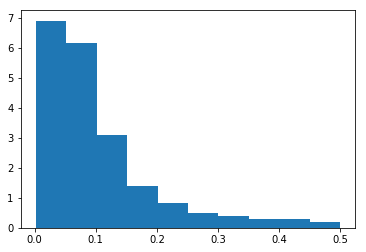

Size is 18108
Averge is 0.10311238255441567
Min is 0.001796541657309679
Max is 0.5


In [141]:
b = a
fig = pl.hist(b, density = True)
pl.show()
print("Size is " + str(len(b)))
print("Averge is " + str(np.mean(b)))
print("Min is " + str(np.amin(b)))
print("Max is " + str(np.amax(b)))


In [79]:

pl.title('Abstract to Article length ratio')
pl.xlabel("value")
pl.ylabel("Frequency")
pl.savefig("daslkfg.png")


['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Your', 's', 'Onward']